<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Churn Modelling</h3>

</div>

Customer churn prediction is to measure why customers are leaving a business. In this code we will be looking at customer churn in IT relevant business. We will build some models to predict the churn and use precision,recall, f1-score to measure performance of our model.

### We will go through project like this:
<h3 style='color:blue'>Handle imbalanced data in churn prediction.</h3>


1. Import Library
2. Load Data
3. EDA
4. Visulization
5. Preprocessing (Encoding , Scaling , Imputation)
6. Training the model
7. Evaluation

# 1. Import Libraries

In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

from pycaret.classification import *

import warnings
warnings.filterwarnings('ignore')

## 2. Load data and make dataframe

In [150]:
df = pd.read_csv("IT_customer_churn.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1474,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.95,4456.65,No
865,Male,0,Yes,No,4,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,319.15,Yes
668,Female,0,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,191.05,Yes
4396,Male,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.1,Yes
4038,Female,0,No,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.60,1093,No


In [151]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [152]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [153]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 3. Do Some EDA

In [154]:
df.isnull().sum().sum()

0

In [155]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**
**Lets convert it to numbers**

**Remove rows with space in TotalCharges**

In [156]:
df1 = df[df["TotalCharges"]!=" "]

In [157]:
df.shape

(7043, 20)

In [158]:
df1.shape

(7032, 20)

In [159]:
pd.to_numeric(df1.TotalCharges,errors='coerce').isnull().sum()

0

In [160]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [161]:
type(df1)

pandas.core.frame.DataFrame

In [162]:
df1.shape

(7032, 20)

In [163]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [164]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 4. Let's do some  Visualization

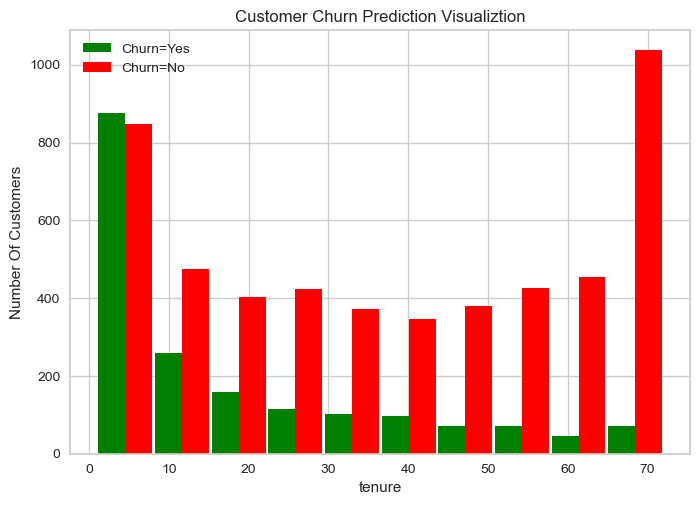

In [165]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


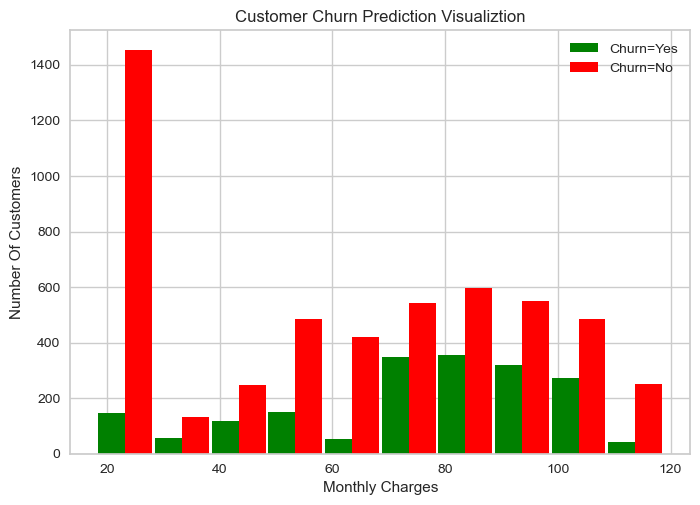

In [166]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# 5. Data Preprocessing

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [167]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [168]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [169]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [170]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Convert Yes and No to 1 or 0**

In [171]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [172]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


**One hot encoding for categorical columns**

In [173]:
df1['gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [174]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [176]:
df1 = pd.get_dummies(df1,['InternetService','Contract','PaymentMethod'])

In [177]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


**Scaling**

In [178]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [179]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [180]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


In [181]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [182]:
classification_setup= setup(data=df1, target='Churn', session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 27)"
4,Transformed data shape,"(7032, 27)"
5,Transformed train set shape,"(4922, 27)"
6,Transformed test set shape,"(2110, 27)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [183]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8037,0.8441,0.5505,0.6559,0.5982,0.4697,0.4732,0.5160
ada,Ada Boost Classifier,0.8025,0.8452,0.5237,0.6634,0.5840,0.4572,0.4634,0.1150
ridge,Ridge Classifier,0.8013,0.0000,0.5237,0.6599,0.5835,0.4553,0.4609,0.0160
lda,Linear Discriminant Analysis,0.7993,0.8368,0.5574,0.6415,0.5962,0.4635,0.4658,0.0220
gbc,Gradient Boosting Classifier,0.7979,0.8455,0.5130,0.6533,0.5743,0.4443,0.4502,0.3530
rf,Random Forest Classifier,0.7962,0.8216,0.5038,0.6505,0.5673,0.4370,0.4434,0.2340
lightgbm,Light Gradient Boosting Machine,0.7940,0.8318,0.5390,0.6325,0.5816,0.4462,0.4489,0.1330
xgboost,Extreme Gradient Boosting,0.7832,0.8168,0.5252,0.6077,0.5630,0.4199,0.4222,0.1010
svm,SVM - Linear Kernel,0.7828,0.0000,0.5078,0.6390,0.5417,0.4072,0.4248,0.1220
et,Extra Trees Classifier,0.7765,0.7946,0.4793,0.5997,0.5319,0.3878,0.3924,0.2030


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Train test split

In [184]:
X = df1.drop('Churn',axis='columns')
y = df1.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [185]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [186]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [187]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [188]:
X_train.shape

(5625, 26)

In [189]:
X_test.shape

(1407, 26)

In [190]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,0,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,0,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,1,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,1,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,0,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,0,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,1,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,0,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,1,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [191]:
len(X_train.columns)

26

# 6&7 .Train the model
**Use logistic regression classifier**

In [192]:
def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)

* weight means you are giving more importance to a particular class.

In [193]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.8031272210376688 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [194]:
weights = [1, 1.5] # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7938877043354655 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1033
         1.0       0.60      0.68      0.64       374

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.80      0.79      0.80      1407



In [195]:
#Gaussian Naive Bayes Classifier
gnbclassifier = GaussianNB()
gnbclassifier.fit(X_train, y_train)
gnb_y_pred = gnbclassifier.predict(X_test)
cl_rep = classification_report(y_test,gnb_y_pred)
print(cl_rep)

              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1033
         1.0       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



* when we don't define class weights we get 0.66 precision and 0.54 recall.
* when we define class weights we get 0.50 precision and 0.79 recall.

# "Imbalanced dataset"

### Method1: Undersampling

In [196]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [197]:
count_class_0

5163

In [198]:
count_class_1

1869

In [199]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [200]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [201]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

#### Applying Logistic Regression

In [202]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7446524064171123 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.73      0.77      0.75       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



<h4 style='color:blue'>With undersampling: f1 score for minority class 1 improved to be 0.75 from 0.59</h4>

### Method2: Oversampling

In [203]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [204]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [205]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

#### Logistic Regression

In [206]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7734753146176185 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1033
           1       0.75      0.82      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066



<h4 style='color:blue'>With oversampling: f1 score for minority class 1 improved to be 0.76 from 0.59</h4>

### Method3: SMOTE

To install imbalanced-learn library use "pip install imbalanced-learn" command

In [207]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [208]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [209]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [211]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

## Final results: Logistic Regression

In [212]:
weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Accuracy 0.7971926427879962 

preds [1 0 1 0 0] 

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



<h4 style='color:blue'>With SMOTE oversampling: f1 score for minority class 1 improved to be 0.81 from 0.59</h4>

In [213]:
#Gaussian Naive Bayes Classifier
gnbclassifier = GaussianNB()
gnbclassifier.fit(X_train, y_train)
gnb_y_pred = gnbclassifier.predict(X_test)
cl_rep = classification_report(y_test,gnb_y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1033
           1       0.74      0.79      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



In [214]:
#final model
model = LogisticRegression()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print("Accuracy", acc, "\n")
y_pred = model.predict(X_test)
print("preds", y_pred[:5], "\n")
cl_rep = classification_report(y_test,y_pred)
print(cl_rep)

Accuracy 0.7971926427879962 

preds [1 0 1 0 0] 

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [215]:
 my_model = 'finalized_model.sav'
 joblib.dump(model, my_model)

['finalized_model.sav']

In [216]:
# # load the model from disk
loaded_model = joblib.load(my_model)
result = loaded_model.predict(X_test)
print(result)

[1 0 1 ... 1 0 1]


<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />